In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df_seq = pd.read_csv('./data/pdb_data_seq.csv')
df_char = pd.read_csv('./data/pdb_data_no_dups.csv')

In [3]:
protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

In [4]:
protein_char.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0


In [5]:
protein_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [6]:
protein_seq.describe(include="all")

,structureId,chainId,sequence,residueCount,macromoleculeType
count,345180,345178,345177,345180.000000,345180
unique,127387,2348,89083,NaN,1
top,3J3Q,A,PIVQNLQGQMVHQAISPRTLNAWVKVVEEKAFSPEVIPMFSALSEG...,NaN,Protein
freq,1356,123105,2580,NaN,345180
mean,NaN,NaN,NaN,4717.870508,NaN
std,NaN,NaN,NaN,26527.126728,NaN
min,NaN,NaN,NaN,3.000000,NaN
25%,NaN,NaN,NaN,398.000000,NaN
50%,NaN,NaN,NaN,856.000000,NaN
75%,NaN,NaN,NaN,1976.000000,NaN


In [7]:
protein_char.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [8]:
protein_char = protein_char[['structureId','classification','residueCount', 'resolution',
       'structureMolecularWeight','crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']]
protein_seq = protein_seq[['structureId','sequence']]
protein_seq.head()

,structureId,sequence
4,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
8,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
11,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
12,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [9]:
protein_char.head()

,structureId,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
2,101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0
4,102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN
5,102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0
7,103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN
8,103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0


In [10]:
model_f = protein_char.set_index('structureId').join(protein_seq.set_index('structureId'))
model_f.head()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence
structureId,,,,,,,,,
101M,OXYGEN TRANSPORT,154,2.07,18112.80,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),165,1.74,18926.61,NaN,2.75,55.28,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,154,1.84,18010.64,NaN,3.09,60.20,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),167,1.90,19092.72,NaN,2.70,54.46,NaN,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,154,2.07,18093.78,NaN,3.09,60.30,9.0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [11]:
print('%d is the number of rows in the joined dataset' %model_f.shape[0])

346325 is the number of rows in the joined dataset


In [12]:
model_f.isnull().sum()

classification                   1
residueCount                     0
resolution                   16093
structureMolecularWeight         0
crystallizationTempK        102391
densityMatthews              38844
densityPercentSol            38710
phValue                      87195
sequence                         3
dtype: int64

In [13]:
model_f = model_f.dropna()
print('%d is the number of proteins that have a classification and sequence' %model_f.shape[0])

214106 is the number of proteins that have a classification and sequence


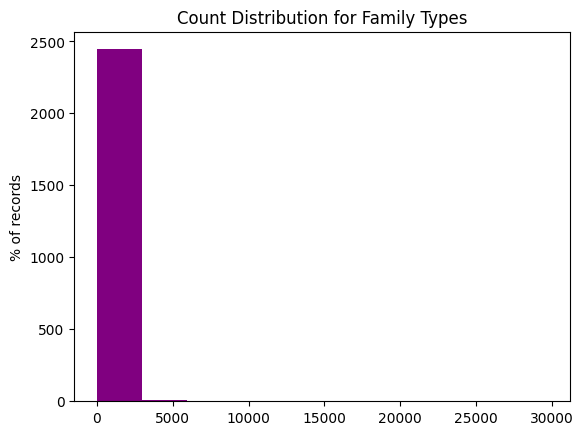

In [14]:
counts = model_f.classification.value_counts()
plt.figure()
plt.hist(counts, color='purple')
plt.title('Count Distribution for Family Types')
plt.ylabel('% of records')
plt.show()

In [15]:
# Get classification types where counts are over 1000
types = np.asarray(counts[(counts > 1000)].index)
print(len(types))
# Filter dataset's records for classification types > 1000
data = model_f[model_f.classification.isin(types)]
data = data.drop_duplicates(subset=["classification","sequence"])  # leaving more rows results in duplciates / index related?

print(types)
print('%d is the number of records in the final filtered dataset' %data.shape[0])

32
['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM'
 'HYDROLASE/HYDROLASE INHIBITOR' 'LYASE' 'TRANSCRIPTION'
 'TRANSPORT PROTEIN' 'ISOMERASE' 'VIRAL PROTEIN' 'SIGNALING PROTEIN'
 'LIGASE' 'PROTEIN BINDING' 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'MEMBRANE PROTEIN'
 'SUGAR BINDING PROTEIN' 'UNKNOWN FUNCTION' 'DNA BINDING PROTEIN'
 'CHAPERONE' 'STRUCTURAL PROTEIN' 'METAL BINDING PROTEIN' 'CELL ADHESION'
 'ELECTRON TRANSPORT' 'PROTEIN TRANSPORT'
 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'TOXIN' 'RNA BINDING PROTEIN'
 'CELL CYCLE' 'PHOTOSYNTHESIS' 'GENE REGULATION' 'DE NOVO PROTEIN']
46422 is the number of records in the final filtered dataset


In [16]:
data = data.drop_duplicates(subset=["classification","sequence"]) 
data.shape

(46422, 9)

In [17]:
def char_grams(text,n=3,jump_size=2):
    return [text[i:i+n] for i in range(0,len(text)-n+1,jump_size)]

In [18]:
data.head(3).sequence.apply(char_grams)

structureId
1A4S    [AQL, LVD, DSM, MPS, SAS, STG, GSV, VVV, VTD, ...
1A6Q    [MGA, AFL, LDK, KPK, KME, EKH, HNA, AQG, GQG, ...
1A72    [STA, AGK, KVI, IKC, CKA, AAV, VLW, WEE, EKK, ...
Name: sequence, dtype: object

In [19]:
data["3mers"] = data.sequence.apply(char_grams)

In [20]:
data.tail()

,classification,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,sequence,3mers
structureId,,,,,,,,,,
6FFL,SUGAR BINDING PROTEIN,388,1.71,44992.17,291.0,2.59,53.00,5.5,EDVRIQIWHQMIYGHRQVLAEALEKFEKENPGITVQATYRETEELR...,"[EDV, VRI, IQI, IWH, HQM, MIY, YGH, HRQ, QVL, ..."
6FG7,PROTEIN BINDING,500,1.90,56392.64,298.0,3.39,63.68,4.0,MKEIGSKPRKLLPLCFIIFLCFCSSVMAADEDDIRCLRGLKASLTD...,"[MKE, EIG, GSK, KPR, RKL, LLP, PLC, CFI, IIF, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MTRLTVLALLAGLLASSRAGSSMASANLEGDALHTLRVTLVDPNNV...,"[MTR, RLT, TVL, LAL, LLA, AGL, LLA, ASS, SRA, ..."
6FG8,PROTEIN BINDING,506,1.25,58478.36,298.0,1.86,33.78,5.5,MKKIFITLLWLLFISSFLCSSSSAEDDVLCLQGLKNSLIDPSSRLS...,"[MKK, KIF, FIT, TLL, LWL, LLF, FIS, SSF, FLC, ..."
6FIF,PROTEIN BINDING,837,2.54,93918.31,298.0,3.32,62.96,4.0,MKTFSSFFLSVTTLFFFSFFSLSFQASPSQSLYREIHQLISFKDVL...,"[MKT, TFS, SSF, FFL, LSV, VTT, TLF, FFF, FSF, ..."


In [21]:
data.to_csv("./data/protein_classification_46k_ngrams.csv")

In [48]:
X = data['sequence']
y = data['classification']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
n_classes = len(class_names)

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [49]:
X_train

structureId
3MGA    SNAMKEALATGSEAWWRTKTGPEWIREKDGNYRVTFWWRDPQGNET...
2ZAG    GPLLAQSAKSMRTTEIETSGWEDALKWLRENTPEYSTATSWWDYGY...
4U0O    MALSRPLPSWLRKPLGKASEISTVQRLVRQYGIHTICEEGRCPNRG...
2A4V    SSDVNELEIGDPIPDLSLLNEDNDSISLKKITENNRVVVFFVYPRA...
3WAL    GSPEFPSDRPFKQRRSFADRCKEVQQIRDQHPSKIPVIIERYKGEK...
                              ...                        
3KML    GANPTTAETLDATRRVDDATVAIRCAINNLIVELIRGTGSYNRSSF...
1P4X    MKYNNHDKIRDFIIIEAYMFRFKKKVKPEVDMTIKEFILLTYLFHQ...
3WL8    AGAGADRTAATPAAANPAATEPVKWECPAGYEVKEGLNVDFPHKGM...
2PLM    MIIGNCLILKDFSSEPFWGAVEIENGTIKRVLQGEVKVDLDLSGKL...
3FJW    ATCDDGRTTANAACCILFPILDDIQENLFDGAQCGEEVHESLRLTF...
Name: sequence, Length: 33423, dtype: object

In [50]:
y_train

array([ 7, 27, 27, ...,  7, 30, 15])

In [51]:
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

In [52]:
prediction = dict()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print( prediction['MultinomialNB'])

0.5598276790522347


In [53]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)
ADA_pred = model.predict(X_test_df)
prediction["Adaboost"] = accuracy_score(ADA_pred , y_test)
print(prediction["Adaboost"])

0.2230479267635972


In [54]:
NB_pred

array([ 0, 27, 29, ...,  7, 18, 15])

In [55]:
y_test

array([ 4,  2, 19, ...,  9, 18, 22])

<Axes: >

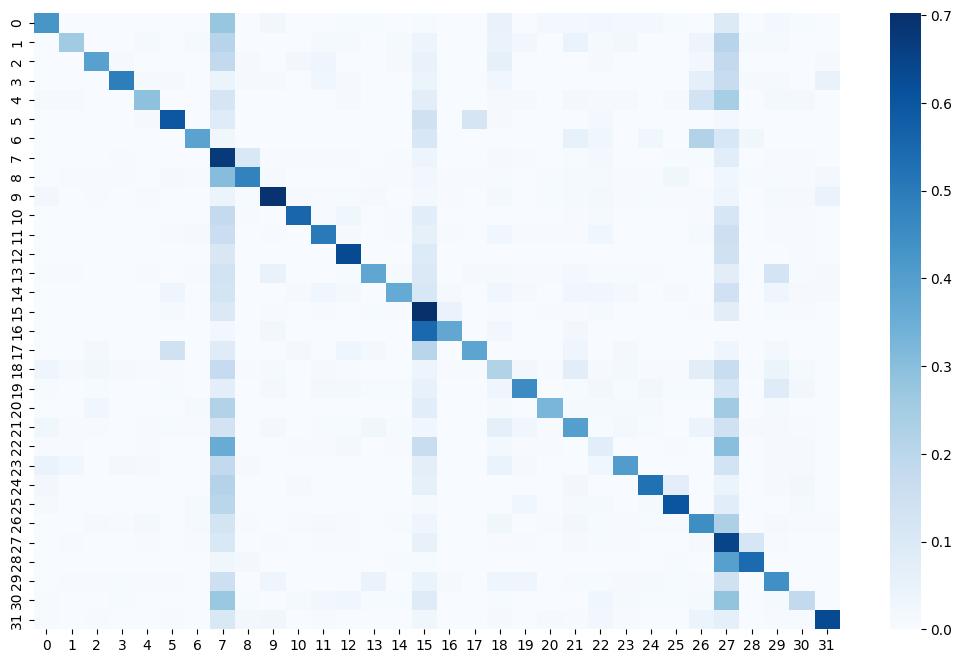

In [56]:
conf_mat = confusion_matrix(y_test, NB_pred)
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

In [57]:
print(classification_report(y_test, NB_pred, target_names = types))

                                         precision    recall  f1-score   support

                              HYDROLASE       0.54      0.43      0.48       138
                            TRANSFERASE       0.54      0.26      0.35        81
                         OXIDOREDUCTASE       0.60      0.39      0.47        97
                          IMMUNE SYSTEM       0.69      0.49      0.58        77
          HYDROLASE/HYDROLASE INHIBITOR       0.54      0.29      0.38       106
                                  LYASE       0.64      0.60      0.62       114
                          TRANSCRIPTION       0.41      0.39      0.40        36
                      TRANSPORT PROTEIN       0.54      0.68      0.60      1712
                              ISOMERASE       0.39      0.48      0.43       268
                          VIRAL PROTEIN       0.90      0.69      0.78       812
                      SIGNALING PROTEIN       0.83      0.56      0.67       234
                           

In [58]:
X_train.shape

(33423,)

In [59]:
X_train

structureId
3MGA    SNAMKEALATGSEAWWRTKTGPEWIREKDGNYRVTFWWRDPQGNET...
2ZAG    GPLLAQSAKSMRTTEIETSGWEDALKWLRENTPEYSTATSWWDYGY...
4U0O    MALSRPLPSWLRKPLGKASEISTVQRLVRQYGIHTICEEGRCPNRG...
2A4V    SSDVNELEIGDPIPDLSLLNEDNDSISLKKITENNRVVVFFVYPRA...
3WAL    GSPEFPSDRPFKQRRSFADRCKEVQQIRDQHPSKIPVIIERYKGEK...
                              ...                        
3KML    GANPTTAETLDATRRVDDATVAIRCAINNLIVELIRGTGSYNRSSF...
1P4X    MKYNNHDKIRDFIIIEAYMFRFKKKVKPEVDMTIKEFILLTYLFHQ...
3WL8    AGAGADRTAATPAAANPAATEPVKWECPAGYEVKEGLNVDFPHKGM...
2PLM    MIIGNCLILKDFSSEPFWGAVEIENGTIKRVLQGEVKVDLDLSGKL...
3FJW    ATCDDGRTTANAACCILFPILDDIQENLFDGAQCGEEVHESLRLTF...
Name: sequence, Length: 33423, dtype: object

In [60]:
y_train

array([ 7, 27, 27, ...,  7, 30, 15])

In [61]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)
# class_names = le.classes_
# y_train

In [62]:
class_names

array(['CELL ADHESION', 'CELL CYCLE', 'CHAPERONE', 'DE NOVO PROTEIN',
       'DNA BINDING PROTEIN', 'ELECTRON TRANSPORT', 'GENE REGULATION',
       'HYDROLASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'IMMUNE SYSTEM',
       'ISOMERASE', 'LIGASE', 'LYASE', 'MEMBRANE PROTEIN',
       'METAL BINDING PROTEIN', 'OXIDOREDUCTASE',
       'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR', 'PHOTOSYNTHESIS',
       'PROTEIN BINDING', 'PROTEIN TRANSPORT', 'RNA BINDING PROTEIN',
       'SIGNALING PROTEIN', 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
       'STRUCTURAL PROTEIN', 'SUGAR BINDING PROTEIN', 'TOXIN',
       'TRANSCRIPTION', 'TRANSFERASE',
       'TRANSFERASE/TRANSFERASE INHIBITOR', 'TRANSPORT PROTEIN',
       'UNKNOWN FUNCTION', 'VIRAL PROTEIN'], dtype=object)

In [63]:
# n_classes = len(class_names)

In [64]:
n_classes

32

In [65]:
avg_char_len = X_train.str.len().mean()
print(f"Average character length: {avg_char_len:.2f}")

Average character length: 272.19


In [66]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 25
max_length = 300

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    split="character",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [67]:
text_vectorizer.adapt(X_train)

In [68]:
import random

random_seq = random.choice(X_train)
print(f"Original text:\n{random_seq}\
      \n\nVectorized version:")
text_vectorizer([random_seq])

Original text:
APQECSDIAFLIDGSGSIIPHDFRRMKEFVSTVMEQLKKSKTLFSLMQYSEEFRIHFTFKEFQNNPNPRSLVKPITQLLGRTHTATGIRKVVRELFNITNGARKNAFKILVVITDGEKFGDPLGYEDVIPEADREGVIRYVIGVGDAFRSEKSRQELNTIASKPPRDHVFQVNNFEALKTIQNQLRECIFAI      

Vectorized version:


C:\Users\user\anaconda3\envs\tf-gpu\lib\random.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]


<tf.Tensor: shape=(1, 300), dtype=int64, numpy=
array([[ 3, 13, 16,  6, 21,  7,  8, 11,  3, 15,  2, 11,  8,  4,  7,  4,
         7, 11, 11, 13, 18,  8, 15, 12, 12, 19,  9,  6, 15,  5,  7, 10,
         5, 19,  6, 16,  2,  9,  9,  7,  9, 10,  2, 15,  7,  2, 19, 16,
        17,  7,  6,  6, 15, 12, 11, 18, 15, 10, 15,  9,  6, 15, 16, 14,
        14, 13, 14, 13, 12,  7,  2,  5,  9, 13, 11, 10, 16,  2,  2,  4,
        12, 10, 18, 10,  3, 10,  4, 11, 12,  9,  5,  5, 12,  6,  2, 15,
        14, 11, 10, 14,  4,  3, 12,  9, 14,  3, 15,  9, 11,  2,  5,  5,
        11, 10,  8,  4,  6,  9, 15,  4,  8, 13,  2,  4, 17,  6,  8,  5,
        11, 13,  6,  3,  8, 12,  6,  4,  5, 11, 12, 17,  5, 11,  4,  5,
         4,  8,  3, 15, 12,  7,  6,  9,  7, 12, 16,  6,  2, 14, 10, 11,
         3,  7,  9, 13, 13, 12,  8, 18,  5, 15, 16,  5, 14, 14, 15,  6,
         3,  2,  9, 10, 11, 16, 14, 16,  2, 12,  6, 21, 11, 15,  3, 11,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [69]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 25
Top 5 most common words: ['', '[UNK]', 'l', 'a', 'g']
Bottom 5 least common words: ['w', 'c', 'x', 'z', 'b']


In [86]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [87]:
# Get a random sentence from training set
random_seq = random.choice(X_train)
print(f"Original text:\n{random_seq}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_seq]))
sample_embed

Original text:
NNYTSLIHSLIEESQNQQEKNEQELLELDKWASLWNWFN      

Embedded version:


C:\Users\user\anaconda3\envs\tf-gpu\lib\random.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]


<tf.Tensor: shape=(1, 300, 128), dtype=float32, numpy=
array([[[-0.02885788, -0.04959565, -0.03080794, ..., -0.04485593,
          0.01380679,  0.03816568],
        [-0.02885788, -0.04959565, -0.03080794, ..., -0.04485593,
          0.01380679,  0.03816568],
        [ 0.03624717, -0.00105458,  0.00343116, ...,  0.01587262,
          0.03561984,  0.03777193],
        ...,
        [-0.02431896, -0.00030115,  0.03215406, ..., -0.00435723,
          0.00664058, -0.01122534],
        [-0.02431896, -0.00030115,  0.03215406, ..., -0.00435723,
          0.00664058, -0.01122534],
        [-0.02431896, -0.00030115,  0.03215406, ..., -0.00435723,
          0.00664058, -0.01122534]]], dtype=float32)>

In [72]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [73]:
y_test

array([ 4,  2, 19, ...,  9, 18, 22])

In [74]:
y_test_str = [class_names[y] for y in y_test]

In [76]:
baseline_results = calculate_results(y_true=y_test,
                                     y_pred=NB_pred)
baseline_results

{'accuracy': 0.5598276790522347,
 'precision': 0.5746849313437242,
 'recall': 0.5598276790522347,
 'f1': 0.5561280904964762}

In [141]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(n_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [142]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 300)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 300, 128)          3200      
                                                                 
 bidirectional_4 (Bidirectio  (None, 300, 256)         263168    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                           

In [143]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
1045/1045 [==============================] - 106s 99ms/step - loss: 2.7725 - accuracy: 0.2202 - val_loss: 2.6324 - val_accuracy: 0.2324
Epoch 2/20
1045/1045 [==============================] - 103s 99ms/step - loss: 2.6242 - accuracy: 0.2493 - val_loss: 2.5665 - val_accuracy: 0.2711
Epoch 3/20
1045/1045 [==============================] - 101s 97ms/step - loss: 2.5067 - accuracy: 0.2815 - val_loss: 2.4454 - val_accuracy: 0.2978
Epoch 4/20
1045/1045 [==============================] - 103s 99ms/step - loss: 2.4077 - accuracy: 0.3046 - val_loss: 2.3503 - val_accuracy: 0.3158
Epoch 5/20
1045/1045 [==============================] - 102s 98ms/step - loss: 2.3128 - accuracy: 0.3331 - val_loss: 2.2844 - val_accuracy: 0.3266
Epoch 6/20
1045/1045 [==============================] - 103s 98ms/step - loss: 2.2106 - accuracy: 0.3601 - val_loss: 2.2170 - val_accuracy: 0.3605
Epoch 7/20
1045/1045 [==============================] - 102s 97ms/step - loss: 2.0873 - accuracy: 0.3929 - val_loss: 2

In [144]:
model.evaluate(X_test, y_test)

291/291 [==============================] - 14s 45ms/step - loss: 2.0926 - accuracy: 0.4255


[2.0925886631011963, 0.425525039434433]

In [145]:
pred_probs = model.predict(X_test)
preds = tf.argmax(pred_probs, axis=1)
results = calculate_results(y_test, preds)
results

291/291 [==============================] - 13s 44ms/step


C:\Users\user\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.42552504038772215,
 'precision': 0.4119483852691328,
 'recall': 0.42552504038772215,
 'f1': 0.39749210242655275}

<Axes: >

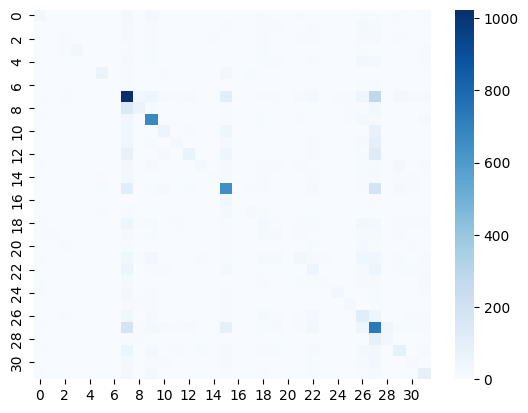

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, cmap="Blues")